# *k*-Nearest Neighbours (*k*-NN)

The *k*-NN algorithm can be used for classification as well as regression tasks. In classification, prediction on the class of a data point is made on the basis of the prevalent class of its *k* nearest neighbours. In regression, the average value of a particular property, of the *k* nearest neighbours is used.  
The use of *k*-NN for classification is demonstrated here, using artificial data with two classes.

## Reading in data and first look

In [1]:
# begin with usual imports for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
# check df head
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Exploratory Data Analysis

In [4]:
# set seaborn theme (optional)
sns.set_theme(style = 'whitegrid', palette = 'viridis')

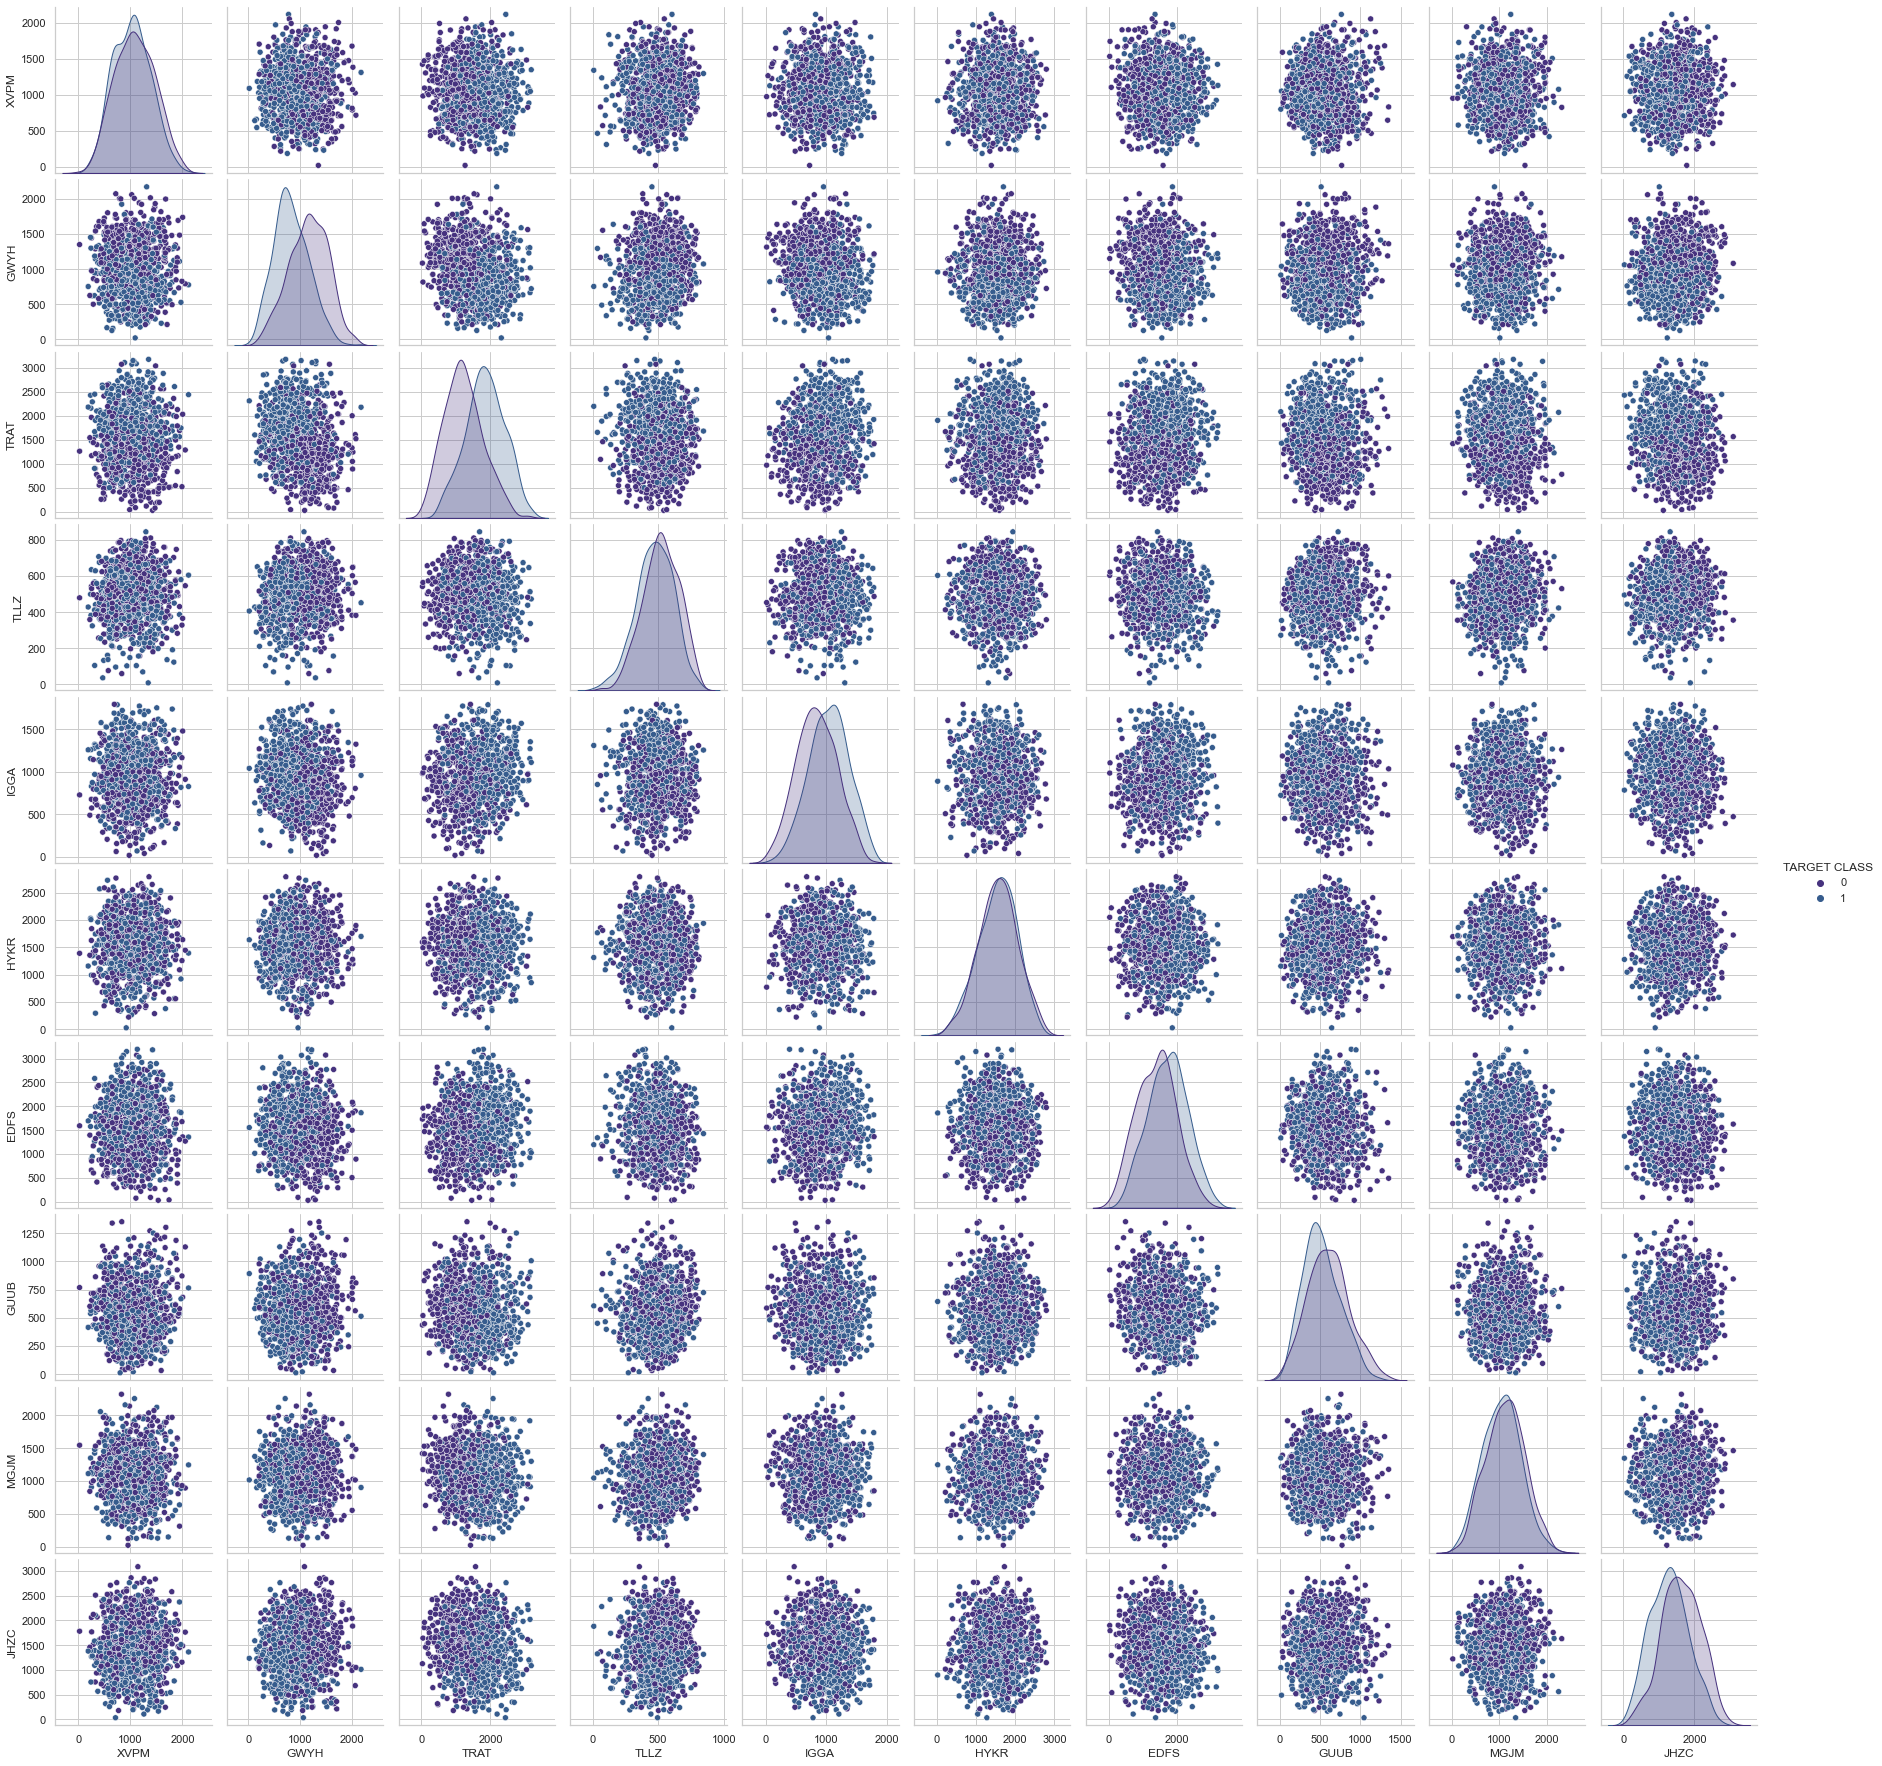

In [5]:
# artificial data, let's just see a dataset-wide pairplot distinguishing by 'TARGET CLASS' (general overview)
sns.pairplot(df, hue = 'TARGET CLASS')

## *k*-NN Analysis

In [6]:
# with data values all over the place, it is an effective practice to standardize/normalize the data
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
scaled_data = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
# store scaled data in a DF, check head
df_scaled = pd.DataFrame(scaled_data, columns = df.columns[:-1])
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [11]:
# train-test splitting of data
from sklearn.model_selection import train_test_split

In [12]:
X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 287)
# as splitting occurs randomly, use "random_state = 287" only to recreate my results exactly

In [13]:
# training the k-NN model
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# start off with a low k value; will optimize later
k_nn = KNeighborsClassifier(n_neighbors = 3)

In [15]:
k_nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# predictions
predictions = k_nn.predict(X_test)

In [17]:
# evaluation using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[122  37]
 [ 31 110]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       159
           1       0.75      0.78      0.76       141

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [19]:
'''choosing optimum k-value: fit model for various k-vals between 1 and 40-60 (usually enough) 
and store counts of wrongly classified data points for each value of k (elbow method)'''
error_count = []

for i in range(1, 60):    
    k_nn = KNeighborsClassifier(n_neighbors = i)
    k_nn.fit(X_train, y_train)
    pred = k_nn.predict(X_test)
    error_count.append(np.mean(pred != y_test))

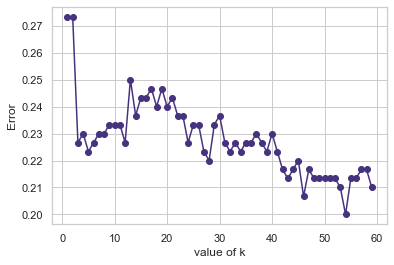

In [20]:
# plot the error count
plt.plot(range(1, 60), error_count, marker = 'o')
plt.xlabel('value of k')
plt.ylabel('Error')
plt.show()

In [21]:
# let's proceed with k = 46
k_nn = KNeighborsClassifier(n_neighbors = 46)
k_nn.fit(X_train, y_train)
predictions = k_nn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[122  37]
 [ 25 116]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       159
           1       0.76      0.82      0.79       141

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



## Conclusion
Data classification via *k*-NN was first demonstrated for a naive guess on *k* value. The elbow method was employed to arrive at an optimum value of *k*, which led to better overall performance.